# Table of Contents
* [Observing Billiards Using Space-time Numbers](#Observing-Billiards-Using-Space-time-Numbers)
	* [Representations of Numbers  Versus Coordinate Transformation of Vectors](#Representations-of-Numbers--Versus-Coordinate-Transformation-of-Vectors)
	* [Observer B Boosted](#Observer-B-Boosted)
	* [Observer C in a Gravity Field in Theory](#Observer-C-in-a-Gravity-Field-in-Theory)
	* [Observer C in a Gravity Field in Practice](#Observer-C-in-a-Gravity-Field-in-Practice)
	* [Conclusions](#Conclusions)


# Observing Billiards Using Space-time Numbers

The goal of this iPython notebook is to become familiar with using space-time numbers to describe events. This will be done for three different observers. The first case will cover the fact that the observers happen to be at different locations. How does one handle different ways to represent the numbers used to characterize events? One observer will be set in constant motion. We will work out the equivalence classes that cover observers in motion. The final case will look at equivalence classes that may happen due to gravity.

Here is an animation of a mini billiard shot.

![](images/Billiards/billiard_video.gif)

The cue ball hits the 8 ball, then into the corner pocket it goes. Observer A is yellow, our proverbial reference observer. I promise to do nothing with her ever. Observer B in pink is at a slightly different location, but still watching from the tabletop. Eventually, he will be set into constant motion. We can see about what Observers agree and disagree about. Observer C is in purple and at the end of a pipe cleaner above the tabletop. His observations will be ever-so-slightly different from Observer A due to the effects of gravity and that will be investigated.

A number of simplifications will be done for this analysis. All but two frames will be used.

![](images/Billiards/shot_12.png)

Get rid of the green felt. In its place, put some graph paper. Add a few markers to make any measurement more precise.

![](images/Billiards/shot_12_no_felt.png)

The image was then printed out so a precise dial caliper could be used to make measurements. Notice that observer A is ~2.5 squares to the left and 3+ squares below the 8 ball in the first frame.

![](images/Billiards/ball_printout.jpg)

Can the time be measured precisely? In this case, I will use the frames of the gif animation as a proxy for measuring time. I used the command "convert billiard_video.gif Frames/billiards_1%02d.png" to make make individual frames from the gif. The two frames are 147 and 158. The speed of the fastest cue break is over 30 miles per hour, or as a dimensionless relativistic speed is 4.5x10<sup>-8</sup>. If small number are used for the differences in space, then the difference between time should be scaled to be in the ten billion range. So that is what I did: call the first time 1,470,000,000 and the second one 1,580,000,000. The ball is then moving around 20mph. I could have found out the frames per second, and calculated the correct speed from there. The three observers do not need to coordinate to figure out the same origin in time, so I chose B and C to start a billion and two billion earlier respectively.

This explains how I got numbers related to an 8 ball moving on a table. Now to start calculating with the goal of getting the square. I have written a test of tools called "Q_tool_devo" that allow for numerical manipulations of something I call "space-time numbers". Essentially they are quaternions, a 4D division algebra, written in a funny way. Instead of writing a real number like 5.0, a doublet of values is used, say (6.0, 1.0) which can then be "reduced" to (5.0, 0) and is thus equivalent to the standard real number 5.0. To create a space-time number, feed it eight numbers like so:

In [1]:
%%capture
import Q_tool_devo as qtd;
Aq1=qtd.Qq([1470000000,0,1.1421,0,1.4220,0,0,0])
Aq2=qtd.Qq([1580000000,0,4.2966,0,0,0.3643,0,0])

In [2]:
q_scale = qtd.Qq([2.2119,0,0,0,0,0,0,0], qtype="S")
Aq1s=Aq1.product(q_scale)
Aq2s=Aq2.product(q_scale)
print(Aq1s)
print(Aq2s)

(3251493000.0, 0.0)_I0,2  (2.5262109899999996, 0.0)_i1,3  (3.1453217999999996, 0.0)_j1,3  (0.0, 0.0)_k1,3  QxS
(3494802000.0, 0.0)_I0,2  (9.50364954, 0.0)_i1,3  (0.0, 0.80579517)_j1,3  (0.0, 0.0)_k1,3  QxS


When scaled, the expected values are seen, the x value at around 2.5, the y value above 3 and zero for z. Event 2 is 9.5 and 0.8 $j_3$ meaning in real numbers, -0.8. There is also the qtype "QxS", a way of keeping track of what operations have been done to a space-time number. After all, all space-time numbers look the same. Keeping the qtype around help avoid combining differing qtypes.

Calculate the delta quaternion between events one and two:

In [3]:
Adq=Aq2s.dif(Aq1s).reduce()
print(Aq2s.dif(Aq1s))
print(Adq)

(3494802000.0, 3251493000.0)_I0,2  (9.50364954, 2.5262109899999996)_i1,3  (0.0, 3.9511169699999997)_j1,3  (0.0, 0.0)_k1,3  QxS-QxS
(243309000.0, 0)_I0,2  (6.9774385500000005, 0)_i1,3  (0.0, 3.9511169699999997)_j1,3  (0.0, 0.0)_k1,3  QxS-QxS.reduce


The difference is nearly 7 in the x<sub>1</sub> direction, and 4 in the j<sub>3</sub>, which if real numbers were being used would be the positive x and negative y. The qtype "QxQ-QxQ.reduce" shows that both initial components were multiplied by a scalar value, the difference taken, then reduced to its real number equivalent form.

Distances are found using a square.

In [4]:
Adq2=Adq.square()
print(Adq2)
print(Adq2.reduce())

(5.9199269481e+16, 64.29597402964808)_I0,2  (3395347192.3239, 0.0)_i1,3  (0.0, 1922684637.70746)_j1,3  (0.0, 0.0)_k1,3  QxS-QxS.reduce.sq
(5.919926948099994e+16, 0)_I0,2  (3395347192.3239, 0.0)_i1,3  (0.0, 1922684637.70746)_j1,3  (0.0, 0.0)_k1,3  QxS-QxS.reduce.sq.reduce


This is a case where the non-reduced form is more convenient. The time squared is about 60 quadrillion while the change in space squared is slightly over 64. Classical physics is full of such imbalances and the non-reduced form helps maintain the separation.

It is my thesis that all the numbers in the square provide important information for comparing any pair of observers. Here are the input numbers for observers B and C:

In [5]:
Bq1=qtd.Qq([2470000000,0,0.8869,0,1.8700,0,0,0])
Bq2=qtd.Qq([2580000000,0,3.9481,0,0,0.1064,0,0])
Bq1s=Bq1.product(q_scale)
Bq2s=Bq2.product(q_scale)
Bdq=Bq2s.dif(Bq1s).reduce()
Cq1=qtd.Qq([3470000000,0,1.1421,0,1.4220,0,1.3256,0])
Cq2=qtd.Qq([3580000000,0,4.2966,0,0,0.3643,1.3256,0])
Cq1s=Cq1.product(q_scale)
Cq2s=Cq2.product(q_scale)
Cdq=Cq2s.dif(Cq1s).reduce()
print(Bq1s)
print(Bq2s)
print(Bdq)
print(Cq1s)
print(Cq2s)
print(Cdq)

(5463393000.0, 0.0)_I0,2  (1.96173411, 0.0)_i1,3  (4.136253, 0.0)_j1,3  (0.0, 0.0)_k1,3  QxS
(5706702000.0, 0.0)_I0,2  (8.73280239, 0.0)_i1,3  (0.0, 0.23534616)_j1,3  (0.0, 0.0)_k1,3  QxS
(243309000.0, 0)_I0,2  (6.77106828, 0)_i1,3  (0.0, 4.37159916)_j1,3  (0.0, 0.0)_k1,3  QxS-QxS.reduce
(7675293000.0, 0.0)_I0,2  (2.5262109899999996, 0.0)_i1,3  (3.1453217999999996, 0.0)_j1,3  (2.93209464, 0.0)_k1,3  QxS
(7918602000.0, 0.0)_I0,2  (9.50364954, 0.0)_i1,3  (0.0, 0.80579517)_j1,3  (2.93209464, 0.0)_k1,3  QxS
(243309000.0, 0)_I0,2  (6.9774385500000005, 0)_i1,3  (0.0, 3.9511169699999997)_j1,3  (0, 0)_k1,3  QxS-QxS.reduce


No set of input numbers for two observers are **ever the same**. Two observers must be located in either a different place in time or a different place in space or both.

In [6]:
Bdq2=Bq1s.dif(Bq2s).reduce().square()
Cdq2=Cq1s.dif(Cq2s).reduce().square()
print(Adq2)
print(Bdq2)
print(Cdq2)

(5.9199269481e+16, 64.29597402964808)_I0,2  (3395347192.3239, 0.0)_i1,3  (0.0, 1922684637.70746)_j1,3  (0.0, 0.0)_k1,3  QxS-QxS.reduce.sq
(5.9199269481e+16, 64.95824486813486)_I0,2  (3294923704.27704, 0.0)_i1,3  (0.0, 2127298840.04088)_j1,3  (0.0, 0.0)_k1,3  QxS-QxS.reduce.sq
(5.9199269481e+16, 64.29597402964808)_I0,2  (3395347192.3239, 0.0)_i1,3  (0.0, 1922684637.70746)_j1,3  (0.0, 0.0)_k1,3  QxS-QxS.reduce.sq


We are comparing apples to apples since the qtype, "QxS-QxS.reduce.sq", are the same. The first of the 8 terms are exactly the same, the I<sub>0</sub>. The reason is the delta time values were exactly the same. The first and third I<sub>2</sub> are exactly the same because their delta values were identical even though they had different z values. A different physical measurement was made for Observer B. The match is pretty good:

In [7]:
(64.96 - 64.30)/64.60

0.010216718266253817

The error is about a percent. So while I reported 4 significant digits, only the first two can be trusted.

The next experiment involved rotating the graph paper for Observer B. This should not change much other than the numbers that get plugged into the interval calculation.

![](images/Billiards/shot_12_no_felt_rotated.png)

In [8]:
BRotq1=qtd.Qq([2470000000,0,0.519,0,1.9440,0,0,0])
BRotq2=qtd.Qq([2580000000,0,3.9114,0,0.5492,0,0,0])
BRotdq2=BRotq1.product(q_scale).dif(BRotq2.product(q_scale)).reduce().square()
print(BRotdq2)
print(Bdq2)

(5.9199269481e+16, 65.82295734469014)_I0,2  (3651410941.5880804, 0.0)_i1,3  (0.0, 1501293474.03816)_j1,3  (0.0, 0.0)_k1,3  QxS-QxS.reduce.sq
(5.9199269481e+16, 64.95824486813486)_I0,2  (3294923704.27704, 0.0)_i1,3  (0.0, 2127298840.04088)_j1,3  (0.0, 0.0)_k1,3  QxS-QxS.reduce.sq


No surprise here: the graph paper will make a difference in the numbers used, but the distance is the same up to the errors made in the measuring process.

## Representations of Numbers  Versus Coordinate Transformation of Vectors

This notebook is focused on space-time numbers that can be added, subtracted, multiplied, and divided. Formally, they are rank 0 tensors. Yet because space-time numbers have four slots to fill, it is quite easy to mistakenly view them as a four dimensional vector space over the mathematical field of real numbers with four basis vectors. Different representations of numbers changes the values of the numbers that get used, but not their meaning. Let's see this in action for a cylindrical representation of a number. Instead of $x$ and $y$, one uses $R \cos(\alpha)$ and $R \sin(\alpha)$, no change for $z$.

![](images/Billiards/shot_12_no_felt_polar.png)

What needs to be done with the measurements done in cylindrical coordinates is to convert them to Cartesian, the proceed with the same calculations.

In [9]:
import math

def cyl_2_cart(q1):
    """Convert a measurment made with cylindrical coordinates in angles to Cartesian cooridantes."""
    
    t = q1.dt.p - q1.dt.n
    r = q1.dx.p - q1.dx.n
    a = q1.dy.p - q1.dy.n
    h = q1.dz.p - q1.dz.n
    
    x = r * math.cos(a * math.pi / 180)
    y = r * math.sin(a * math.pi / 180)
    
    return qtd.Qq([t, x, y, h])

For polar coordinates, measure directly the distance between the origin and the billiard ball. Then determine an angle. This constitutes a different approach to making a measurement.

In [10]:
BPolarq1=cyl_2_cart(qtd.Qq([2470000000,0,2.0215,0, 68.0,0,0,0]))
BPolarq2=cyl_2_cart(qtd.Qq([2580000000,0,3.9414,0,1.2,0,0,0]))
BPolardq2=BPolarq1.product(q_scale).dif(BPolarq2.product(q_scale)).reduce().square()
print(BPolardq2)
print(Bdq2)

(5.9199269481e+16, 65.28358588503004)_I0,2  (3426312023.8477516, 0.0)_i1,3  (0.0, 1928561196.6468496)_j1,3  (0.0, 0.0)_k1,3  QxS-QxS.reduce.sq
(5.9199269481e+16, 64.95824486813486)_I0,2  (3294923704.27704, 0.0)_i1,3  (0.0, 2127298840.04088)_j1,3  (0.0, 0.0)_k1,3  QxS-QxS.reduce.sq


Yet the result for the interval is the same: the positive time squared term is exactly the same since those numbers were not changed, and the negative numbers for the space terms were only different to the error in measurement.

## Observer B Boosted

Give Observer B a Lorenz boost. All that is needed is to relocate Observer B in the second frame like so:

![](images/Billiards/shot_12_no_felt_boosted.png)

To make the math simpler, presume all the motion is along $x$, not the slightest wiggle along $y$ or $z$. Constant motion between the frames shown is also presumed.

What velocity is involved? THat would be the change in space, 2, over the time, a big number

In [11]:
vx = 2/Bdq.dt.p
print(vx)

8.220000082200001e-09


This feels about right. The speed of observer B is about what a cube ball is.

Boost the delta by this velocity.

In [12]:
Bdq_boosted = Bdq.boost(beta_x = vx)
print(Bdq_boosted)
print(Bdq_boosted.reduce())
print(Bdq)
print(Bdq_boosted.dif(Bdq).reduce())

(364963500.00000006, 121654500.00000018)_I0,2  (12.15660242, 9.38553414)_i1,3  (2.1857995800000003, 6.55739874)_j1,3  (7.186909090909091e-08, 7.186909090909091e-08)_k1,3  QxS-QxS.reduce.boost
(243308999.99999988, 0)_I0,2  (2.7710682799999997, 0)_i1,3  (0, 4.37159916)_j1,3  (0, 0)_k1,3  QxS-QxS.reduce.boost.reduce
(243309000.0, 0)_I0,2  (6.77106828, 0)_i1,3  (0.0, 4.37159916)_j1,3  (0.0, 0.0)_k1,3  QxS-QxS.reduce
(0, 1.1920928955078125e-07)_I0,2  (0, 3.9999999999999982)_i1,3  (0, 0)_j1,3  (0, 0)_k1,3  QxS-QxS.reduce.boost-QxS-QxS.reduce.reduce


The last line indicates there is no difference between the boosted values of $y$ and $z$, as expected. Both the change in time and in space are negative. Moving in unison is a quality of simple boosts. The change in time is tiny. The change in space is almost 4, but not quite due to the work of the $\gamma$ factor that altered the time measurement.

Compare the squares of the boosted with the non-boosted Observer B

In [13]:
print(Bdq_boosted.square())
print(Bdq.square())

(1.4799817370250035e+17, 8.879890422150043e+16)_I0,2  (11157017260.692606, 9808565556.415565)_i1,3  (3190948260.0613227, 5318247100.102201)_j1,3  (69.94558656000004, 69.94558656000004)_k1,3  QxS-QxS.reduce.boost.sq
(5.9199269481e+16, 64.95824486813486)_I0,2  (3294923704.27704, 0.0)_i1,3  (0.0, 2127298840.04088)_j1,3  (0.0, 0.0)_k1,3  QxS-QxS.reduce.sq


Time and space are mixing together for the boosted frame. There are two huge numbers for $I_0$ and $I_2$ instead of a big number and about 65. Are they the same? Compare the reduced squares:

In [14]:
print(Bdq_boosted.square().reduce())
print(Bdq.square().reduce())

(5.919926948099992e+16, 0)_I0,2  (1348451704.2770405, 0)_i1,3  (0, 2127298840.0408788)_j1,3  (0, 0)_k1,3  QxS-QxS.reduce.boost.sq.reduce
(5.919926948099994e+16, 0)_I0,2  (3294923704.27704, 0.0)_i1,3  (0.0, 2127298840.04088)_j1,3  (0.0, 0.0)_k1,3  QxS-QxS.reduce.sq.reduce


The reduced intervals are the same. The space-times-time terms are not. The difference between the space-times-time terms can be used to determine how Observer B boosted in moving relative to Observer B (calculation not done here). Even with out going into detail, the motion is only along x because that is the only term that changes.

Software was written to systematically look at equivalences classes for a pair of quaternions. Three types of comparisons are made: linear, squared, and the norm.

In [15]:
qb = qtd.EQ(Bdq, Bdq_boosted)
print(qb)

The equivalence classes for this pair of events are as follows...
q1: 243309000.0t  6.77106828i  -4.37159916j  0.0k  Q
q2: 243308999.99999988t  2.7710682799999997i  -4.37159916j  0k  Q
q1_squared: 5.919926948099994e+16t  3294923704.27704i  -2127298840.04088j  0.0k  Q
q2_squared: 5.919926948099992e+16t  1348451704.2770393i  -2127298840.0408788j  0.0k  Q
q1_norm -1: 5.919926948100006e+16t  0i  0j  0k  Q
q2_norm -1: 5.919926948099997e+16t  0i  0j  0k  Q
                time: future_exact
             space-1: right
             space-2: down_exact
             space-3: here_exact
           causality: time-like_exact
  space-times-time-1: future-right
  space-times-time-2: future-down_exact
  space-times-time-3: here-now_exact
       norm_of_unity: greater_than_unity_exact



There are 9 equivalences classes in all. Let's visualize them a set of icons:

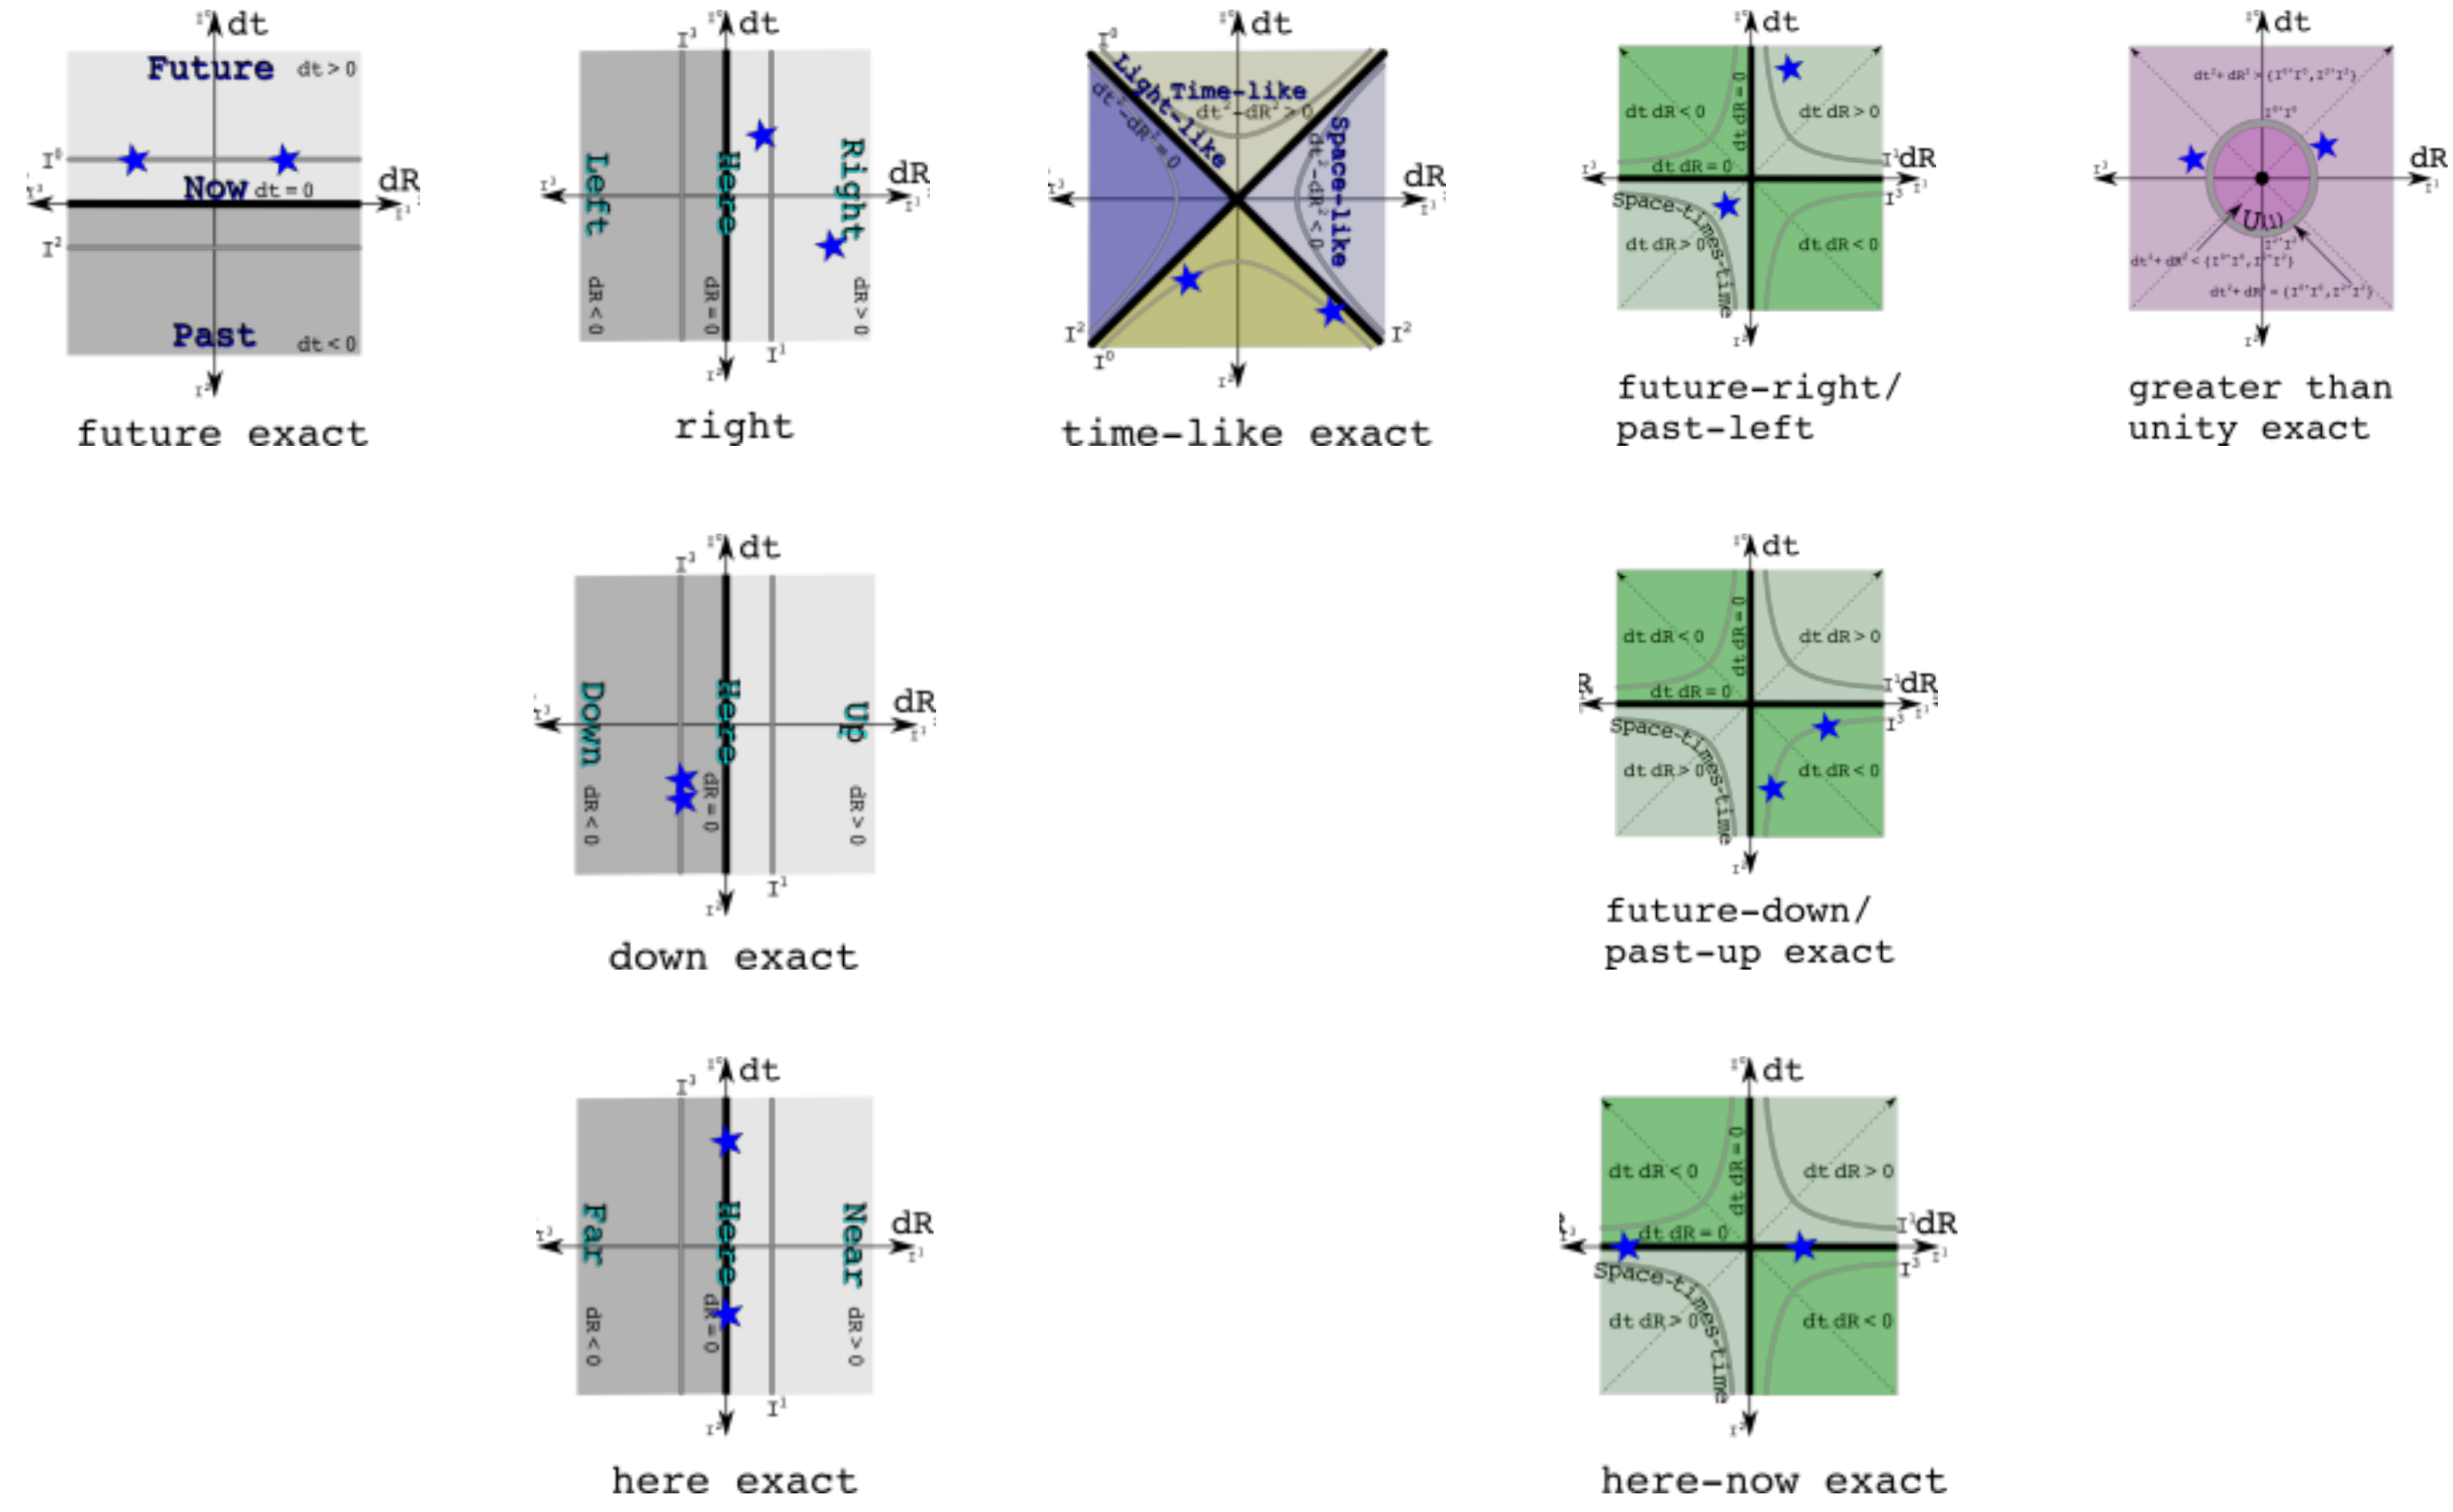

In [16]:
qb.visualize()

The figures in gray are location in time and 3 for space. The colorful set with parabolas are the squares, the interval being purple and off-yellow, space-times-time in green. The norm is in pink.

For the gray set, the events from Observer B are being compared with a boosted Observer B for motion that is only along the $x$ direction. We thus expect the $y$ and $z$ values to be exact as they are (down exact and here exact because $z=0$). The value of $x$ is boosted, so they are both right, but not the same value. But what about time? The report is for an exact match. The software was written to say two values were equivalent if they were the same to 10 significant digits. It is the 16th significant digit which is different.

The time-like interval is the same for Observer B and the boosted one, so the equivalence class is time-like-exact as expected. This graphics are icons to represent the class, not a reflection of the numbers used. The space-times-time terms are only different along $t x$ due to the boost along $x$.

The norm is included for completeness of simple operations, but I don't understand it at this time. It is marked as exact due to the dominance of the time term.

## Observer C in a Gravity Field in Theory

The video of the billiard balls shows there is a gravity field since the eight-ball drops into the pocket. Newton's law of gravity can be written as an interval:

$$d \tau^2 = \left(1 - 2\frac{G M}{c^2 R}\right) dt^2 - dR^2/c^2 $$

More precise measurements of weak field gravity adds a few more terms (essentially equation 40.1 of Misner, Thorne and Wheeler):

$$d \tau^2 = \left(1 - 2\frac{G M}{c^2 R} + 2 \left(\frac{G M}{c^2 R}\right)^2\right) dt^2 - \left(1 + 2\frac{G M}{c^2 R}\right) dR^2 /c^2 $$

When the mass $M$ goes to zero or the distance from the source gets large, the result is the interval expected in flat space-time.

The space-times-times equivalence class as gravity proposal stipulates that for a simple gravitational source mass (spherically symmetric, non-rotating, uncharged) the square of a delta quaternion produces a space-times-time that is the same for different observers no matter where they are in a gravitational field. This can be achieved by making the factor for time be the inverse of the one for space (below, a dimensionless M is a stand-in for $\frac{G M}{c^2 R}$).

In [17]:
from sympy import symbols
M = symbols('M')
(1/(1 - 2 * M)).series(M, 0, n=2)

1 + 2*M + O(M**2)

Even in the "classical realm", the space-times-time equivalence class as gravity proposal is different from Newtonian gravity. From my brief study of the rotation of thin disk galaxies, this term is not applied to such calculations. This now strikes me as odd. The Schwarzschild solution has this same term, the "first order in M/R", yet only the dt correction is used in practice. The rotation profile calculation is quite complex, needing elliptical integrals. An analytic solution like that would be altered by this well know term. It will be interesting in time to explore if the extra term has consequences.

Since we are analyzing the square, the delta quaternion would be the square root of with these two terms that use the dimensionless gravitational length:

$$ \begin{align*} dq &= \left(\sqrt{1 - 2 \frac{G M}{c^2 R}} dt, \sqrt{1 + 2 \frac{G M}{c^2 R}} dR/c \right) \\ dq^2 &= \left( \left(1 - 2 \frac{G M}{c^2 R}\right) dt^2 - \left(1 + 2 \frac{G M}{c^2 R}\right) dR^2/c^2, 2 ~dt ~dR/c  \right) \\
&= \left( d\tau^2, 2 ~dt ~dR/c \right) \end{align*} $$

To be consistent with the weak gravity field tests and the algebraic constraints of the equivalence class proposal requires six terms not five:

In [18]:
(1/(1 - 2 * M + 2 * M ** 2)).series(M, 0, n=3)

1 + 2*M + 2*M**2 + O(M**3)

Here are the delta quaternion and its square in a gravity field that will be consistent with all weak field gravitational tests.

$$ \begin{align*} dq &= \left(\sqrt{1 - 2 \frac{G M}{c^2 R} + 2 \left(\frac{G M}{c^2 R}\right)^2} dt, \sqrt{1 + 2 \frac{G M}{c^2 R} + 2 \left(\frac{G M}{c^2 R}\right)^2} dR/c \right) \\ dq^2 &= \left( \left(1 - 2 \frac{G M}{c^2 R} + 2 \left(\frac{G M}{c^2 R}\right)^2\right) dt^2 - \left(1 + 2 \frac{G M}{c^2 R} + 2 \left(\frac{G M}{c^2 R}\right)^2\right) dR^2/c^2, 2 ~dt ~dR/c  \right) \\
&= \left( d\tau^2, 2 ~dt ~dR/c \right) \end{align*} $$

The second order term for $ dR^2 $ has consequences that are tricky to discuss. Notice that no mention has been made of metric, not field equations, nor covariant and contra-variant vectors. That is because numbers are tensors of rank 0 that are equipped with rules of multiplication and division. As discussed above, there are different representations of numbers like a Cartesian representation, a cylindrical representation, and a spherical representation. My default is to use the Cartesian representation because I find it simplest to manage.

The most successful theory for gravity, general relativity, does using metrics, covariant and contra-variant tensors, as well as connections that reveal how a metric changes in space-time. There are a great many technical choices in this process which have consequences. Einstein worked with a torsion-free connection that was metric compatible. One consequence is that dealing with fermions is an open puzzle. The process of getting to an interval is not simple. Twenty non-linear equation equations must be solved. This can be done analytically for only the simplest of cases. It is such a case, the Schwarzschild solution, that makes up most of the tests of general relativity (eq. 40.1 from MTW written above in isotrophic coordinates).

The reader is being asked to compare Einstein's apple of an interval to the first of four oranges. There is no overlap between the mechanics of the math, hence the apple versus orange. The forms of the expressions are the same: a Taylor series in a dimensionless gravitational length. Five of the coefficients of the Taylor series are identical. Those five coefficients have been tested in a wide variety of classical tests of weak gravitational fields.

The sixth term is not the same for the Taylor series expansion of the Schwarzschild solution in either isotrophic or Schwarzschild coordinates. It is not reasonable to expect the simple space-times-time equivalence constraint will solve the non-linear Einstein field equations.

The truncated series expansion will not be the final story. We could wait for experimentalist to determine 10 terms, but that is quite unreasonable (Personal story: I spend ~$600 to go to an Eastern Gravity Meeting just to ask Prof. Clifford Will when we might get the terms for second order Parameterize Post-Newtonian accuracy, and at the time he knew of no such planned experimental effort ~2005?). Given that gravity is o harmonic phenomena, there are six terms that match, and many other people have made the same speculation, it is a small leap to suggest that a positive and negative exponential to the dimensionless mass length may be the complete solution for simple systems:

$$ \begin{align*} dq &= \left(\exp\left({-\frac{G M}{c^2 R}}\right) dt, \exp\left(\frac{G M}{c^2 R} \right) dR/c \right) \\ dq^2 &= \left( \exp \left(-2\frac{G M}{c^2 R} \right) dt^2 - \exp \left( 2 \frac{G M}{c^2 R} \right) dR^2/c^2, 2 ~dt ~dR/c  \right) \\
&= \left( d\tau^2, 2 ~dt ~dR/c \right) \end{align*} $$

The exponential interval does appear in the literature since it makes calculations far simpler. 

## Observer C in a Gravity Field in Practice

Gravity is impressively weak. The distance of Observer C over Observer A is impressively small. The change in the interval should in practice be beyond measure.

\begin{align*}
G&=6.67384\cdot 10^{-11} \frac{m^{3}}{kg s^2}\\
M&=5.9722 \cdot 10^{24} kg\\
c&=299792458 m / s \\
R&=6.371 \cdot 10^{6} m
\end{align*}

In [19]:
GMc2R_for_Observer_A = 6.67384e-11 * 5.9722e+24 / (299792458 ** 2 * 6371000)
GMc2R_for_Observer_C = 6.67384e-11 * 5.9722e+24 / (299792458 ** 2 * 6371000.1)
print(GMc2R_for_Observer_A)
print(GMc2R_for_Observer_C)

6.960831529374463e-10
6.960831420116397e-10


Moving 10 centimeters is not much.

Do the "minimal" shift meaning the three terms of the Taylor series.

In [20]:
Adq_g = Cdq.g_shift(GMc2R_for_Observer_A, g_form="minimal")
Cdq_g = Cdq.g_shift(GMc2R_for_Observer_C, g_form="minimal")
print(Adq_g)
print(Cdq_g)

(243308999.830637, 0)_I0,2  (6.97743855485688, 0)_i1,3  (0, 3.95111697275031)_j1,3  (0, 0)_k1,3  QxS-QxS.reduce.g_minimal
(243308999.830637, 0)_I0,2  (6.97743855485688, 0)_i1,3  (0, 3.95111697275031)_j1,3  (0, 0)_k1,3  QxS-QxS.reduce.g_minimal


The squares could be calculated, but if the input values are the same, there will be no difference in any of the squares. This is consistent with expectations: a small number change in a small number cannot be noticed.

Observer C is a mere 10 centimeters away from Observer A. Let us make the distance so vast that the GMc2R value is zero.

In [21]:
Cdq_g_zero = Cdq.g_shift(0, g_form="minimal")
print(Adq_g)
print(Cdq_g_zero)

(243308999.830637, 0)_I0,2  (6.97743855485688, 0)_i1,3  (0, 3.95111697275031)_j1,3  (0, 0)_k1,3  QxS-QxS.reduce.g_minimal
(243309000.000000, 0)_I0,2  (6.97743855000000, 0)_i1,3  (0, 3.95111697000000)_j1,3  (0, 0)_k1,3  QxS-QxS.reduce.g_minimal


Get far enough away, and the effects of gravity may become apparent.

The equivalence classes for this pair of events are as follows...
q1: 5.91992693985847E+16t  3395347192.32390i  -1922684637.70746j  0k  Q
q2: 5.91992694809999E+16t  3395347192.32390i  -1922684637.70746j  0k  Q
q1_squared: 3.50455349732619E+33t  4.02004146280221E+26i  -2.27643051672328E+26j  0k  Q
q2_squared: 3.50455350708404E+33t  4.02004146839878E+26i  -2.27643051989245E+26j  0k  Q
q1_norm -1: 3.50455349732622E+33t  0i  0j  0k  Q
q2_norm -1: 3.50455350708407E+33t  0i  0j  0k  Q
                time: future
             space-1: right_exact
             space-2: down_exact
             space-3: here_exact
           causality: time-like
  space-times-time-1: future-right_exact
  space-times-time-2: future-down_exact
  space-times-time-3: here-now_exact
       norm_of_unity: greater_than_unity



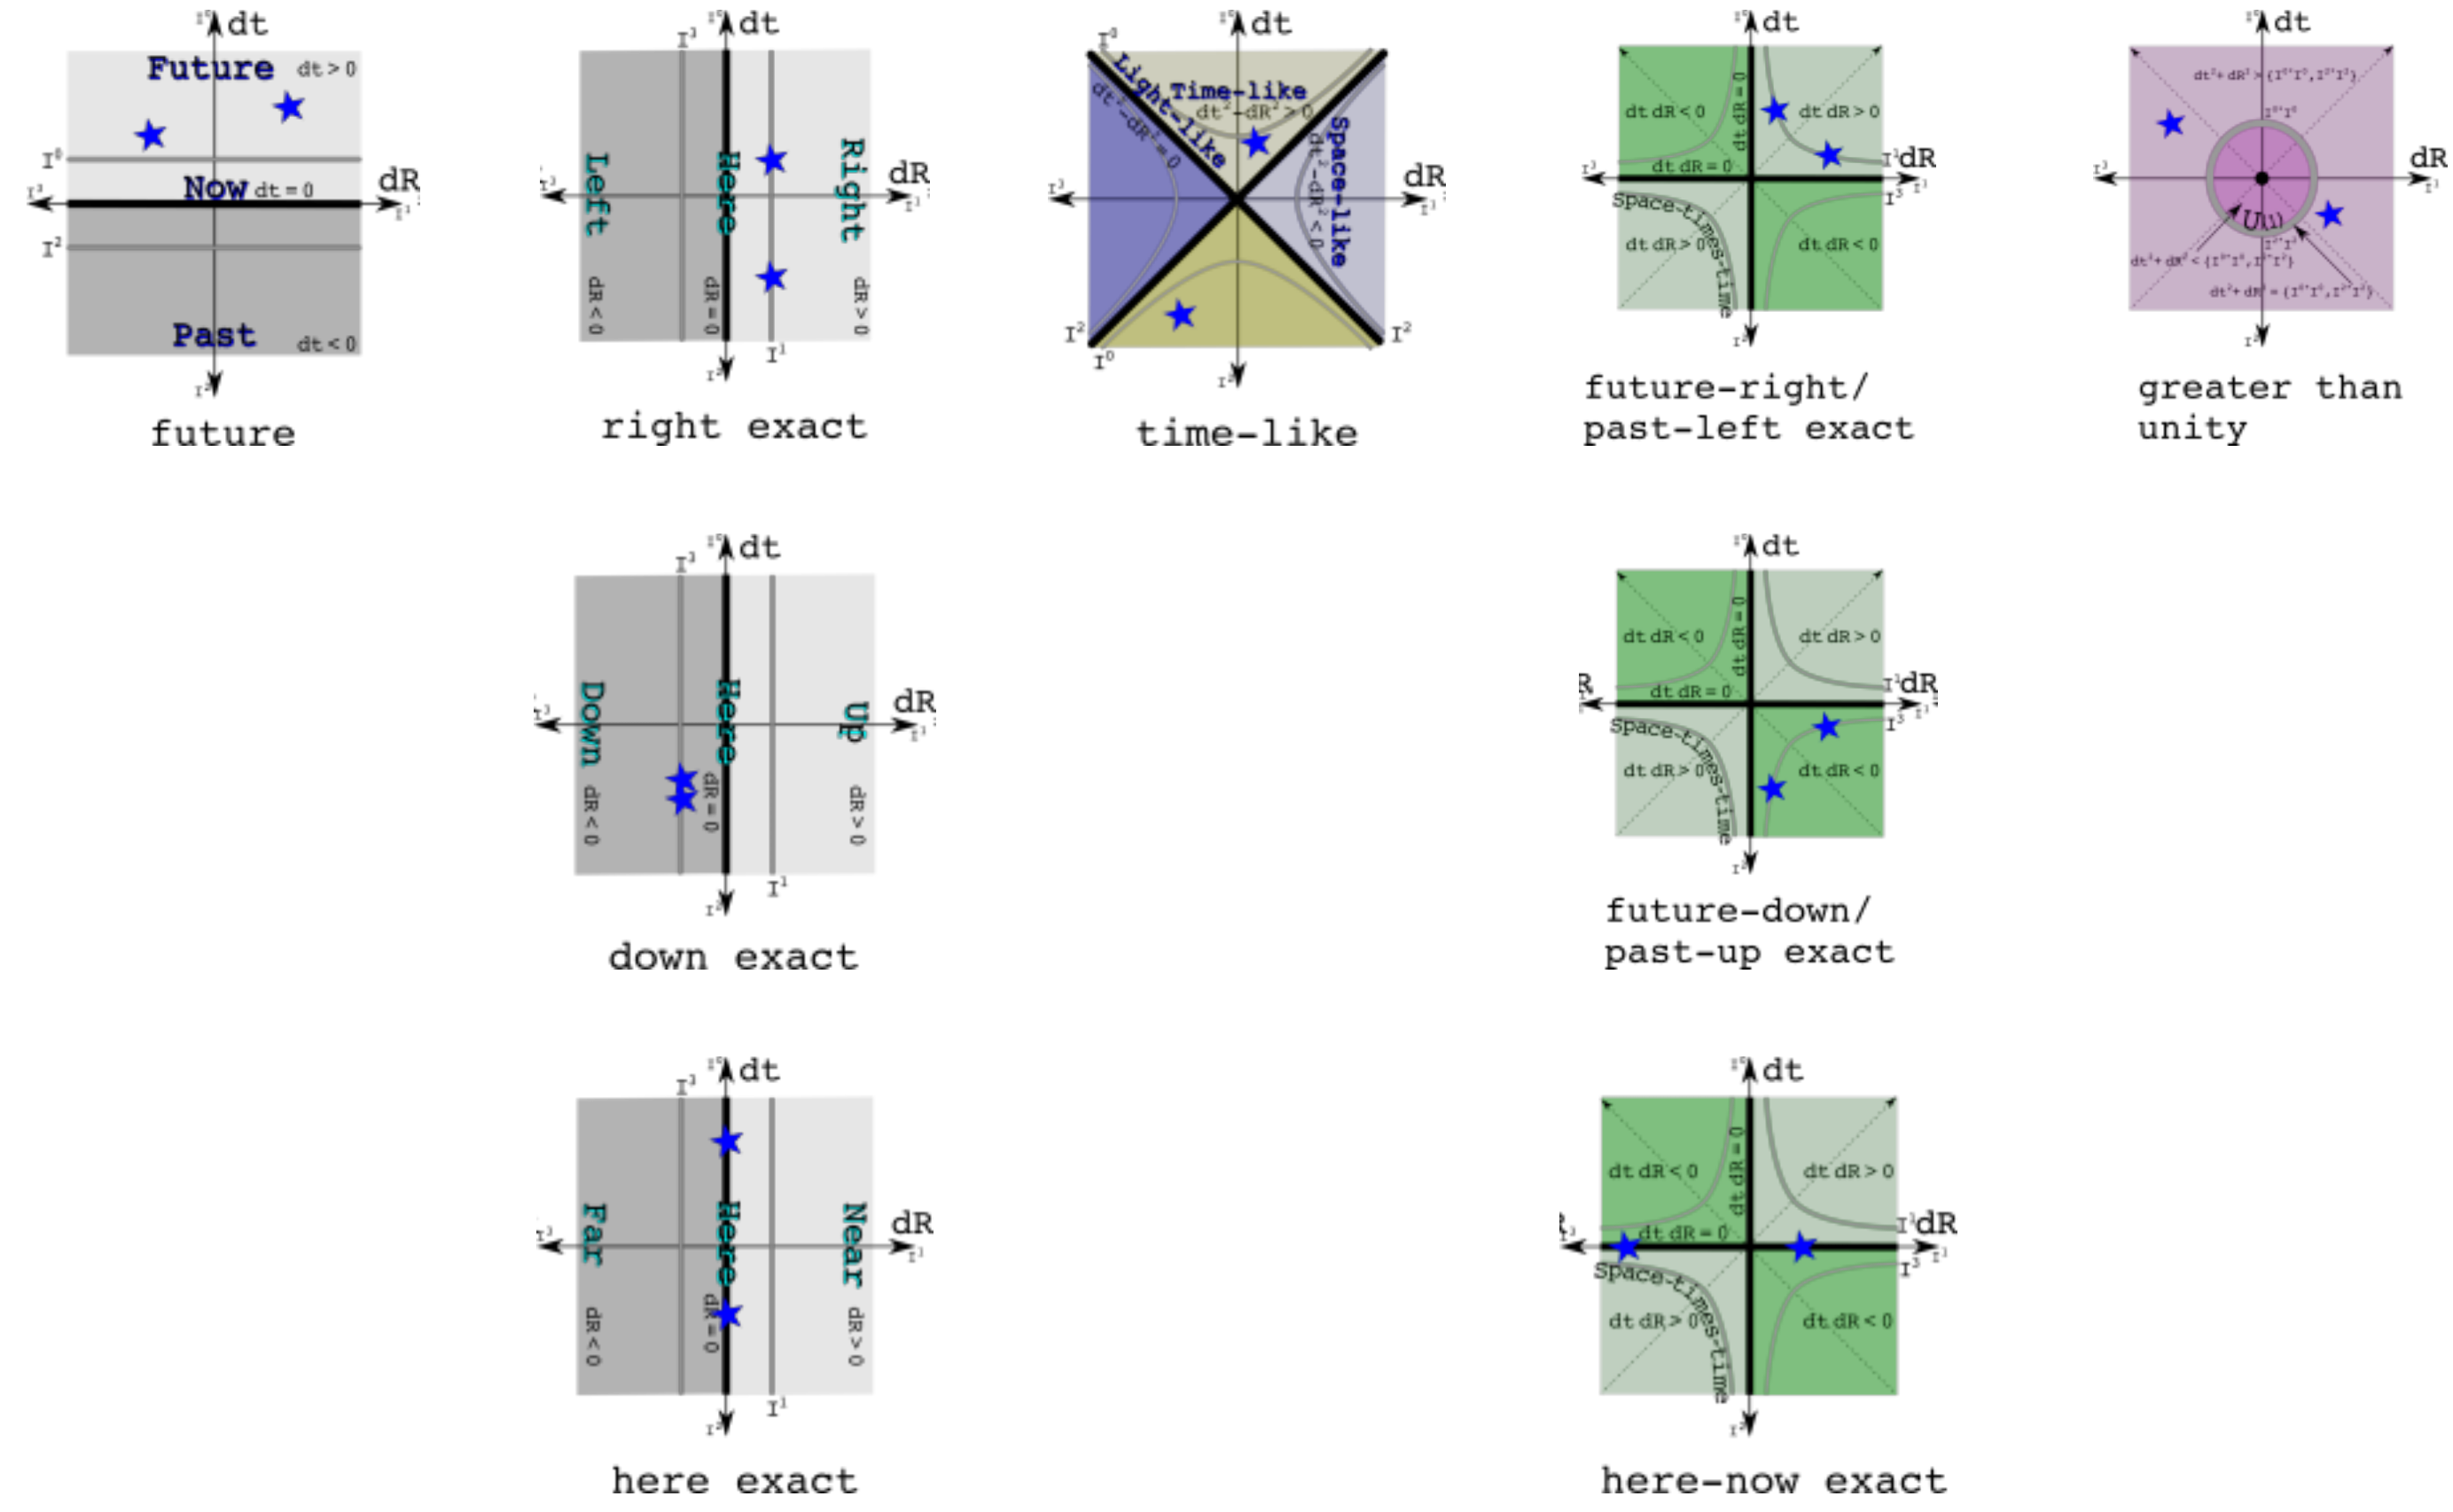

In [22]:
Adq_g_2 = Adq_g.square() 
Cdq_g_zero_2 = Cdq_g_zero.square()
eq_g = qtd.EQ(Adq_g_2, Cdq_g_zero_2)
print(eq_g)
eq_g.visualize()

The time-like interval is not exact. That is the effect of gravity. Yet these pairs of observers, A and C at an very great distance from A, all have exact space-times-time values as the quaternion gravity proposal demands.

## Conclusions

Nearly all calculations in physics I have ever done involved vector spaces over a mathematical field like real or complex numbers. This iPython notebook used a fundamentally new and different toolset. Space-time numbers can always be made equivalent to the 4D division algebra of quaternions through the process of reduction. This new breed of numbers was applied to the simple case of an eight-ball moving along a pool table. Three observers watched the events unfold. Their raw data always was different because that is inherent in the definition of being a different observer. Yet by taking the difference between two events and squaring it, equivalence classes could be defined. If two observers agree on the first term of the square, that means the two observers are moving at a constant speed relative to each other. The other three terms can be used to figure out the motion. While this might be view as a novel approach to special relativity, nothing new is claimed.

If two observers are in an equivalence class because the difference between two events squared space-times-time values are exactly the same, this is a new proposal for how gravity works. There is no metric tensor, connection, nor field equations. Rather, the proposal is a twin of special relativity. In both cases it is the square that matters. The difference between the two is if the observers agree to the reduced real values, that is special relativity, where if they agree to the reduced imaginary values, that is space-times-time equivalence class as gravity.

Space-time numbers should feel odd. We expect numbers to be unique. Yet Nature plays unusual games with the numbers for particles such as boson versus fermion statistics. Space-time numbers may be rich enough to reflect these kinds of properties. This notebook represents a proof of concept.